In [3]:
import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

import warnings

# Suprime todas las advertencias
warnings.filterwarnings("ignore")

In [4]:
# Asignamos el CSV "unicorn_startup_companies.csv" a una varible
unicorn_startup_companies = "../data/unicorn_startup_companies.csv"
cb_insights_global_unicorns = "../data/CB-Insights_Global-Unicorn-Club_2023.csv"

In [5]:
# Leemos nuestro CSV con read_csv() de Pandas.
df_unicorn_startup_companies = pd.read_csv(unicorn_startup_companies)

# Imprimimos
print("Información del dataframe :")
print("- - "*7)
print(f"Observaciones (filas): {df_unicorn_startup_companies.shape[0]}")
print(f"Atributos (columnas):     {df_unicorn_startup_companies.shape[1]}")
print(f"Tamaño (elementos):    {df_unicorn_startup_companies.size}")

Información del dataframe :
- - - - - - - - - - - - - - 
Observaciones (filas): 1221
Atributos (columnas):     8
Tamaño (elementos):    9768


In [6]:
df_unicorn_startup_companies.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [40]:
# Eliminamos la columna 'Unnmaed: 0' de nuestro dataframe.
df_unicorn_startup_companies.drop(columns = ['Unnamed: 0'], inplace=True)

In [41]:
df_unicorn_startup_companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [42]:
df_unicorn_startup_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1221 non-null   object
 1   Valuation ($B)    1221 non-null   object
 2   Date Joined       1221 non-null   object
 3   Country           1221 non-null   object
 4   City              1203 non-null   object
 5   Industry          1221 non-null   object
 6   Select Investors  1219 non-null   object
dtypes: object(7)
memory usage: 66.9+ KB


Observamos que el data frame contienen datos no numéricos en las columnas 'City' (18 NaN)y 'Select Investors' (2 NaN). 

Vamos a mirar a que se deben estos NaN.

In [43]:
# Sacamos todos los NaN de la columna 'City'.
df_unicorn_startup_companies[df_unicorn_startup_companies['City'].isna()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
239,HyalRoute,$3.50,5/26/2020,Singapore,NaN,Industrials,Kuang-Chi
313,Amber Group,$3,6/21/2021,Hong Kong,NaN,Financial Services,"Tiger Global Management, Tiger Brokers, DCM Ve..."
343,Moglix,$2.60,5/17/2021,Singapore,NaN,Industrials,"Jungle Ventures, Accel, Venture Highway"
371,Coda Payments,$2.50,4/15/2022,Singapore,NaN,Financial Services,"GIC. Apis Partners, Insight Partners"
488,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
500,Trax,$2,7/22/2019,Singapore,NaN,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
534,Scroll,$1.80,3/14/2023,Seychelles,NaN,Financial Services,"OKX Ventures, Sequoia Capital China, IOSG"
559,Kredivo Holdings,$1.66,8/15/2022,Singapore,NaN,Financial Services,"Jungle Ventures, Square Peg Capital, OpenSpace..."
617,bolttech,$1.50,7/1/2021,Singapore,NaN,Insurance,"Mundi Ventures, Doqling Capital Partners, Acti..."
892,Carousell,$1.10,9/15/2021,Singapore,NaN,Consumer & Retail,"500 Global, Rakuten Ventures, Golden Gate Vent..."


Sorpresa! Resulta que los NaN tienen que ver con que los países de Singapore y Hong Kong son ciudades estado, es decir que son ciudad, nación y estado al mismo tiempo. 

* En realidad Hong Kong, es un caso especial, porque muy a su pesar, aunque tengan su propio govierno, en cierta manera, aunque no sea una ciudad China, tampoco es un país independizado por completo. Pero en nuestro caso, respetaremos a lo qu eparece el deseo de muchos Hong Kongeses/esas, de ser una ciudad estado.

Por lo tanto, al ser ciudades estado, vamos asiganar en las observaciones de cada NaN hallados de la columna 'City' el mismo valor de la columna 'Country' por lo que no vamos hacer uso del dropna().

In [44]:
# Reemplazamos los valores NaN en 'City' con los valores de 'Country' donde 'City' es NaN
df_unicorn_startup_companies['City'].fillna(df_unicorn_startup_companies['Country'], inplace=True)

# Imprimimos la información del DataFrame actualizado
df_unicorn_startup_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1221 non-null   object
 1   Valuation ($B)    1221 non-null   object
 2   Date Joined       1221 non-null   object
 3   Country           1221 non-null   object
 4   City              1221 non-null   object
 5   Industry          1221 non-null   object
 6   Select Investors  1219 non-null   object
dtypes: object(7)
memory usage: 66.9+ KB


Observamos que aún tenemos 2 NaN en la columna 'Select Investor'.

In [45]:
# Sacamos todos los NaN de la columna 'Select Investor'.
df_unicorn_startup_companies[df_unicorn_startup_companies['Select Investors'].isna()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
935,Avenue One,$1,5/15/2023,United States,New York,Financial Services,NaN
969,LinkSure Network,$1,1/1/2015,China,Shanghai,Industrials,NaN


In [46]:
df_unicorn_startup_companies.head(2)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [47]:
# De la primera muetra de nuestro data frmae imprimimos el tipo de dato y el valor de la columna 'Company'.
print(f"La columna 'Select Investors' es del tipo:\n{df_unicorn_startup_companies['Select Investors'].dtype}")
for i in df_unicorn_startup_companies[df_unicorn_startup_companies['Company'] == df_unicorn_startup_companies['Company'][0]]['Select Investors']:
    print(f"\nEl dato de la fila 0 y de la columna 'Select Investors' es una:\n{type(i)}")
    print(f"\nDato situado en la fila 0 y en la columna 'Select Investors':\n{i}")

La columna 'Select Investors' es del tipo:
object

El dato de la fila 0 y de la columna 'Select Investors' es una:
<class 'str'>

Dato situado en la fila 0 y en la columna 'Select Investors':
Sequoia Capital China, SIG Asia Investments, Sina Weibo, SoftBank Group


Vemos que los 2 datos NaN que queremos arreglar en la columna 'Select Investors' corresponden a un string que en la mayoría de las muestra se nos presenta con la información de las 3 principales firmas inversoras que han invertido en la empresa unicornio.

La solución será restaurar estos 2 NaN a le que le asignaremos las 3 firmas inversoras que más hayan invertido en la misma ciudad o estado por cada industria a la que hace refrencia la muestra en la que se hayen nuestros NaN.

- Muestras:
    - Muestra 1 = Avenue One 
        - 'Country' == United States
        - 'City' == New York
        - 'Industry' == Financial Services
    - Muestra 2 = LinkSure Network
        - 'Country' == China
        - 'City' == Shanghai
        - 'Industry' == Industrials

In [48]:
# Creamos un nuevo dataset y filtramos las filas que no tienen valores no nulos en 'Select Investors' de nuestro main data frame.
filtered_df = df_unicorn_startup_companies.dropna(subset=['Select Investors'])

In [49]:
filtered_df['Select Investors'].value_counts()

Select Investors
Sequoia Capital                                                                    3
General Atlantic                                                                   3
Andreessen Horowitz                                                                2
FTV Capital                                                                        2
Insight Partners, Sequoia Capital, Index Ventures                                  2
                                                                                  ..
Expa, QED Investors, Foundation Capital                                            1
Andreessen Horowitz, Andreessen Horowitz, Institutional Venture Partners, Accel    1
Founders Fund, Meritech Capital Partners, GS Growth                                1
Knox Lane, Ainge Advisory, Carlson Private Capital Partners                        1
Boost VC, Draper Associates, Gaingels                                              1
Name: count, Length: 1200, dtype: int64

In [50]:
# Explode the 'Select Investors' column to separate the lists
exploded_df = filtered_df.explode('Select Investors')

# Calcular el conteo de inversiones por país
investment_counts_by_country = exploded_df['Country'].value_counts()

# Mostrar la suma total del conteo de inversiones por país
print("Suma total del conteo de inversiones por país:")
print(investment_counts_by_country)

Suma total del conteo de inversiones por país:
Country
United States           655
China                   172
India                    70
United Kingdom           52
Germany                  30
France                   25
Israel                   24
Canada                   21
Brazil                   16
South Korea              14
Singapore                14
Australia                 8
Indonesia                 8
Mexico                    8
Japan                     7
Netherlands               7
Sweden                    7
Hong Kong                 7
Switzerland               6
Ireland                   6
Spain                     5
Finland                   4
Norway                    4
Thailand                  3
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Chile                     2
South Africa              2
Italy                     2
Croatia                   2
Austria                   2
Greece               

In [51]:
# Contamos el número de unicornios por país
startup_counts_by_country = exploded_df['Country'].value_counts().reset_index()
startup_counts_by_country.columns = ['Country', 'Unicorn Count']

# Imprimir el resultado
print("Número de unicornios por país:")
startup_counts_by_country

Número de unicornios por país:


,Country,Unicorn Count
0,United States,655
1,China,172
2,India,70
3,United Kingdom,52
4,Germany,30
5,France,25
6,Israel,24
7,Canada,21
8,Brazil,16
9,South Korea,14


In [52]:
# Calculamos el conteo de inversiones por país
investment_counts_by_country = exploded_df['Country'].value_counts().reset_index()
investment_counts_by_country.columns = ['Country', 'Unicorn Count']

# Creamos el gráfico de barras con etiquetas de texto
fig = px.bar(investment_counts_by_country, x='Country', y='Unicorn Count', 
             text='Unicorn Count',  # Agregar el número de inversiones como texto
             title='Número de Unicornios por País',
             labels={'Country': 'País', 'Unicorn Count': 'Número de Unicornios'})

fig.update_layout(title_x=0.5)

# Mostramos el gráfico
fig.show()

In [53]:
# Imprimimos el dato.
filtered_df['Select Investors'][1]

'Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures'

Como obtenemo un String compuesto de los (3) principales inverores, vamos a proceder a serpar todos los inversores.

In [54]:
# Dividimos la columna 'Select Investors' en una lista de inversores.
filtered_df['Select Investors'] = filtered_df['Select Investors'].str.split(', ')

In [55]:
# Creamos lista para añadir todos los inversores
all_inversores = []

# Combinamos todas las listas de inversores (que se hayan en "filtered_df['Select Investors']") en una sola lista.
for sublista in filtered_df['Select Investors']:
    for inversor in sublista:
        all_inversores.append(inversor)

# Luego, puedes utilizar 'value_counts' para contar la frecuencia de cada inversor.
contaje_inversores = pd.Series(all_inversores).value_counts()

# Para obtener los 10 principales inversores que invirtieron más, puedes hacer lo siguiente:
top_10_invesores = contaje_inversores.head(10)

# Imprime los resultados.
print(top_10_invesores)

Accel                          64
Andreessen Horowitz            64
Tiger Global Management        57
Sequoia Capital                52
Insight Partners               51
Sequoia Capital China          49
Lightspeed Venture Partners    41
General Catalyst               41
SoftBank Group                 35
Index Ventures                 35
Name: count, dtype: int64


In [56]:
# Imprimimos de nuevo la clumna. 
filtered_df['Select Investors']

0       [Sequoia Capital China, SIG Asia Investments, ...
1       [Founders Fund, Draper Fisher Jurvetson, Rothe...
2       [Tiger Global Management, Sequoia Capital Chin...
3           [Khosla Ventures, LowercaseCapital, capitalG]
4       [Sequoia Capital China, Blackbird Ventures, Ma...
                              ...                        
1216    [Gaja Capital Partners, Stakeboat Capital, Wes...
1217    [Hyde Park Venture Partners, Bain Capital Vent...
1218    [Eclipse Ventures, D1 Capital Partners, Indust...
1219            [Google Ventures, Accel, Data Collective]
1220              [Boost VC, Draper Associates, Gaingels]
Name: Select Investors, Length: 1219, dtype: object

In [60]:

# Explode the 'Select Investors' column to separate the lists
exploded_df = filtered_df.explode('Select Investors')

# Encuentra los 20 inversores más repetidos por país
top_investors_by_country = exploded_df.groupby(['Country', 'Select Investors']).size().reset_index(name='Count')
top_investors_by_country = top_investors_by_country.groupby('Country').apply(lambda x: x.nlargest(20, 'Count')).reset_index(drop=True)

# Imprime los resultados
print("Los 20 inversores más repetidos por cada país:")
print(top_investors_by_country)

Los 20 inversores más repetidos por cada país:
       Country       Select Investors  Count
0    Argentina             Monashees+      1
1    Argentina         Ribbit Capital      1
2    Argentina  Soros Fund Management      1
3    Australia     Blackbird Ventures      3
4    Australia       AirTree Ventures      2
..         ...                    ...    ...
534    Vietnam        Fabric Ventures      1
535    Vietnam              GS Growth      1
536    Vietnam      Goodwater Capital      1
537    Vietnam        Standard Crypto      1
538    Vietnam         Warburg Pincus      1

[539 rows x 3 columns]


In [87]:
# Desglosa la columna 'Select Investors' para separar las listas
exploded_df = filtered_df.explode('Select Investors')

# Encuentra los 20 inversores más repetidos por país
top_investors_by_country = exploded_df.groupby(['Country', 'Select Investors']).size().reset_index(name='Count')
top_investors_by_country = top_investors_by_country.groupby('Country').apply(lambda x: x.nlargest(20, 'Count')).reset_index(drop=True)

# Ordenar los inversores de mayor a menor por cantidad de inversiones
top_investors_by_country = top_investors_by_country.sort_values(by='Count', ascending=False)

# Imprimir los resultados
print("El inversor que más ha invertido en cada país (ordenado de mayor a menor):")
top_investors_by_country.head(10)


El inversor que más ha invertido en cada país (ordenado de mayor a menor):


,Country,Select Investors,Count
513,United States,Andreessen Horowitz,58
514,United States,Sequoia Capital,42
84,China,Sequoia Capital China,38
515,United States,Accel,38
516,United States,General Catalyst,34
518,United States,Tiger Global Management,32
517,United States,Lightspeed Venture Partners,32
519,United States,Insight Partners,31
520,United States,Google Ventures,24
208,India,Sequoia Capital India,23


In [106]:
# Ordenar los inversores de mayor a menor por cantidad de inversiones
top_investors_by_country = top_investors_by_country.sort_values(by='Count', ascending=False)

# Imprimir los resultados
print("El inversor que más ha invertido en cada país (ordenado de mayor a menor):")
top_investors_by_country.head(10)

El inversor que más ha invertido en cada país (ordenado de mayor a menor):


,Country,Select Investors,Count
513,United States,Andreessen Horowitz,58
514,United States,Sequoia Capital,42
84,China,Sequoia Capital China,38
515,United States,Accel,38
516,United States,General Catalyst,34
518,United States,Tiger Global Management,32
517,United States,Lightspeed Venture Partners,32
519,United States,Insight Partners,31
520,United States,Google Ventures,24
208,India,Sequoia Capital India,23


In [107]:
# Creamos un nuevo DataFrame que filtra las empresas de Servicios Financieros en Nueva York o Estados Unidos
financial_services_in_us_ny = filtered_df[
    ((filtered_df['Industry'] == 'Financial Services') &
    ((filtered_df['City'] == 'New York') | (filtered_df['Country'] == 'United States')))
]

print(f"Número total de inversiones en Estados Unidos o NY: {financial_services_in_us_ny.shape[0]}")
financial_services_in_us_ny.head()

Número total de inversiones en Estados Unidos o NY: 106


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"[Khosla Ventures, LowercaseCapital, capitalG]"
10,Chime,$25,3/5/2019,United States,San Francisco,Financial Services,"[Forerunner Ventures, Crosslink Capital, Homeb..."
19,Ripple,$15,12/20/2019,United States,San Francisco,Financial Services,"[IDG Capital, Venture51, Lightspeed Venture Pa..."
21,Plaid,$13.50,12/11/2018,United States,San Francisco,Financial Services,"[New Enterprise Associates, Spar Capital, Inde..."
31,GoodLeap,$12,10/13/2021,United States,Roseville,Financial Services,"[New Enterprise Associates, BDT Capital Partne..."


In [108]:
# Contamos la frecuencia de cada inversor en Financial Services en NY y/o US
investor_counts_financial_services_us = (
    financial_services_in_us_ny.explode('Select Investors')['Select Investors']
    .value_counts()
)

# # Imprimimos las 3 firmas de inversores que más hayan invertido en Financial Services en NY y/o US
# investor_counts_financial_services_us.head(3)


In [109]:
investor_counts_financial_services_us

Select Investors
Andreessen Horowitz        8
Accel                      7
General Catalyst           5
Greycroft                  5
Tiger Global Management    5
                          ..
QED Investors              1
D1 Capital Partners        1
Sway Ventures              1
ICONIQ Growth              1
Zeal Capital Partners      1
Name: count, Length: 212, dtype: int64

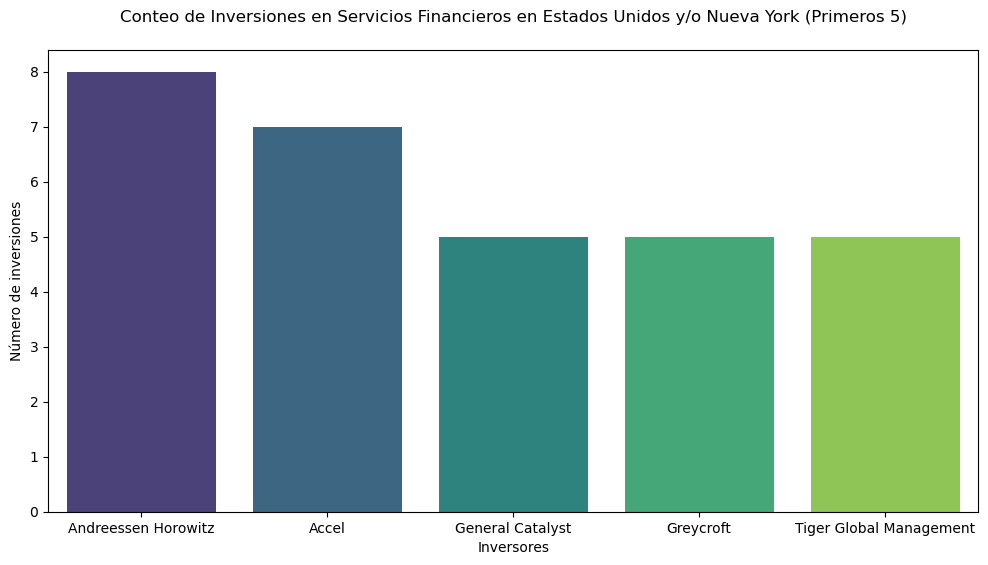

In [110]:
# Crear un gráfico de barras para mostrar inversores y sus cuentas
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=investor_counts_financial_services_us.head(5).index, y=investor_counts_financial_services_us.head(5).values, palette="viridis")

plt.xlabel("Inversores")
plt.ylabel("Número de inversiones")
plt.title("Conteo de Inversiones en Servicios Financieros en Estados Unidos y/o Nueva York (Primeros 5)", pad=20)
plt.show()

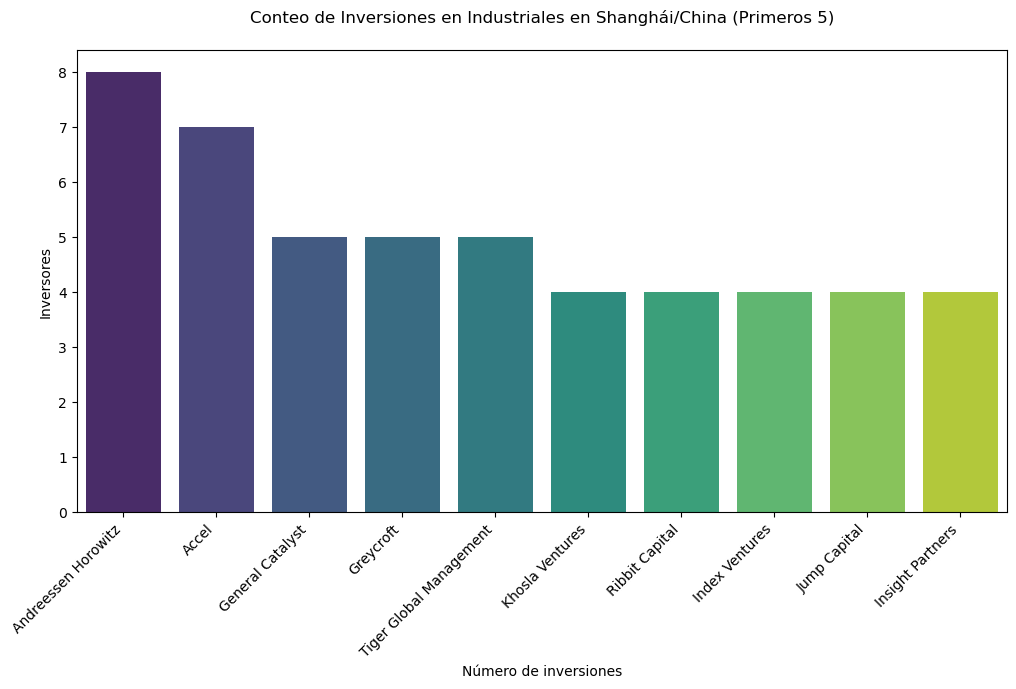

In [111]:
# Creamos un gráfico de barras para mostrar inversores y sus cuentas
plt.figure(figsize=(12, 6))
sns.barplot(x=investor_counts_financial_services_us.head(10).index, y=investor_counts_financial_services_us.head(10).values , palette="viridis")
plt.xlabel("Número de inversiones")
plt.ylabel("Inversores")
plt.title("Conteo de Inversiones en Industriales en Shanghái/China (Primeros 5)", pad = 20)
# Girar los nombres de los inversores 45 grados
plt.xticks(rotation=45, ha="right")  # La opción 'ha' alinea correctamente las etiquetas
plt.show()

In [112]:
# Creamos un nuevo DataFrame que filtra las empresas de Industrial en Nueva York o Estados Unidos
industrials_in_china = filtered_df[
    ((filtered_df['Industry'] == 'Industrials') &
    ((filtered_df['City'] == 'Shanghai') | (filtered_df['Country'] == 'China')))
]

print(f"Número total de inversiones en China o Shanhai: {industrials_in_china.shape[0]}")
industrials_in_china.head()

Número total de inversiones en China o Shanhai: 55


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
15,DJI Innovations,$15,1/23/2015,China,Shenzhen,Industrials,"[Accel Partners, Sequoia Capital]"
36,ZongMu Technology,$11.40,6/3/2021,China,Shanghai,Industrials,"[LTW Capital, Legend Capital, Qualcomm Ventures]"
99,SVOLT,$6.51,6/8/2020,China,Changzhou,Industrials,"[IDG Capital, Bank Of China Group Investment,,..."
110,Royole Corporation,$6,8/18/2015,China,Shenzhen,Industrials,"[Warmsun Holding, IDG Capital Partners]"
131,Hello TransTech,$5,6/1/2018,China,Shanghai,Industrials,"[Ant Financial Services Group, GGV Capital]"


In [113]:
# Contamos la frecuencia de cada inversor en Industrials en Shanhai y/o China
investor_counts_industrials_china = (
    industrials_in_china.explode('Select Investors')['Select Investors']
    .value_counts()
)

# # Imprimimos las 3 firmas de inversores que más hayan invertido en Industrials en Shanhai y/o China
# investor_counts_industrials_china.head(3)

In [114]:
investor_counts_industrials_china


Select Investors
IDG Capital                            7
Sequoia Capital China                  5
Tencent Holdings                       4
Qiming Venture Partners                4
Source Code Capital                    2
                                      ..
Intel Capital                          1
Walden International                   1
Zhangjiang Haocheng Venture Capital    1
Trustbridge Partners                   1
Nine Intelligence Capital              1
Name: count, Length: 121, dtype: int64

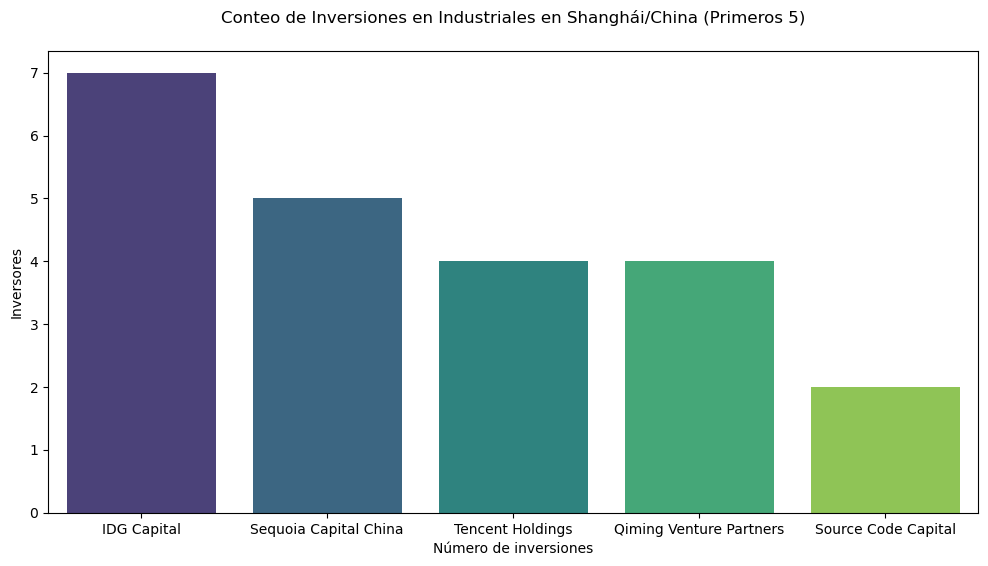

In [115]:
# Creamos un gráfico de barras para mostrar inversores y sus cuentas
plt.figure(figsize=(12, 6))
sns.barplot(x=investor_counts_industrials_china.head(5).index, y=investor_counts_industrials_china.head(5).values , palette="viridis")
plt.xlabel("Número de inversiones")
plt.ylabel("Inversores")
plt.title("Conteo de Inversiones en Industriales en Shanghái/China (Primeros 5)", pad = 20)
# Girar los nombres de los inversores 45 grados
# plt.xticks(rotation=45, ha="right")  # La opción 'ha' alinea correctamente las etiquetas
plt.show()

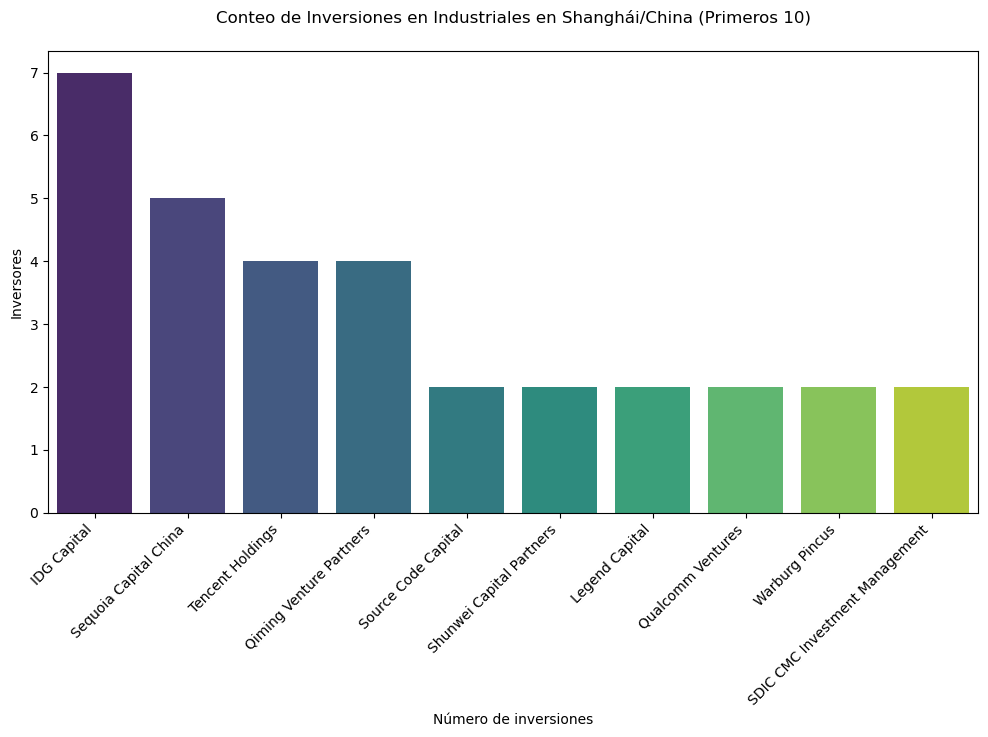

In [116]:
# Creamos un gráfico de barras para mostrar inversores y sus cuentas
plt.figure(figsize=(12, 6))
sns.barplot(x=investor_counts_industrials_china.head(10).index, y=investor_counts_industrials_china.head(10).values , palette="viridis")
plt.xlabel("Número de inversiones")
plt.ylabel("Inversores")
plt.title("Conteo de Inversiones en Industriales en Shanghái/China (Primeros 10)", pad = 20)
# Girar los nombres de los inversores 45 grados
plt.xticks(rotation=45, ha="right")  # La opción 'ha' alinea correctamente las etiquetas
plt.show()

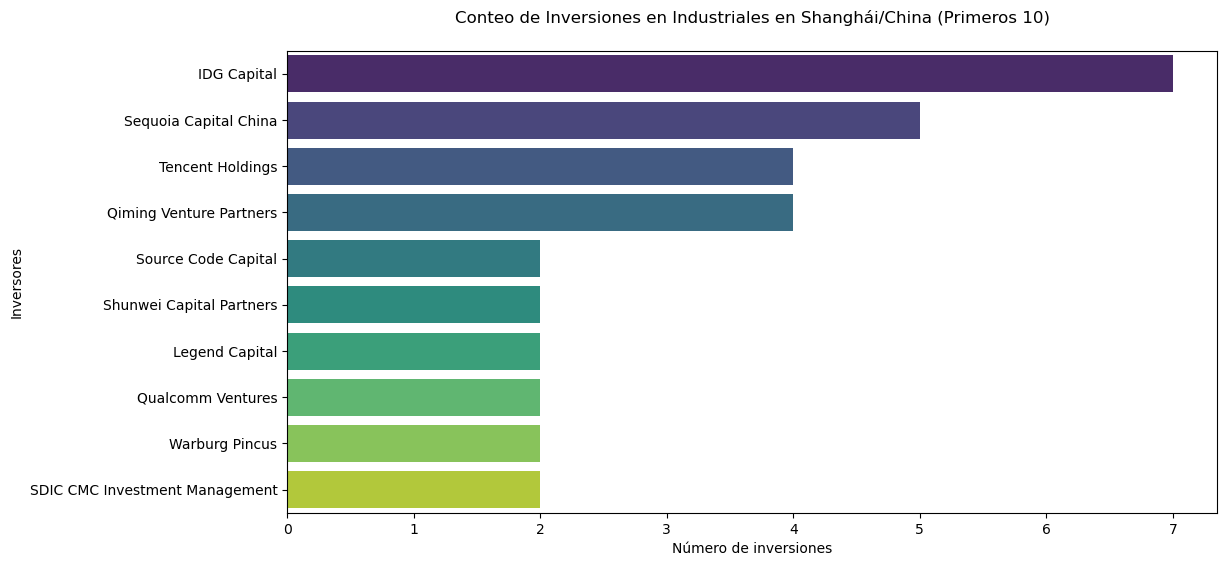

In [117]:
# Creamos un gráfico de barras para mostrar inversores y sus cuentas
plt.figure(figsize=(12, 6))
sns.barplot(x=investor_counts_industrials_china.head(10).values, y=investor_counts_industrials_china.head(10).index, palette="viridis")
plt.xlabel("Número de inversiones")
plt.ylabel("Inversores")
plt.title("Conteo de Inversiones en Industriales en Shanghái/China (Primeros 10)", pad=20)  # Añadir espacio con el parámetro 'pad'
plt.show()


In [118]:
# Buscamos a los 3 inversores con la frecuencia más alta en Financial Services en NY y/o US
top_investor_financial_services_us = investor_counts_financial_services_us.head(3)
# Buscamos a los 3 inversores con la frecuencia más alta en Industrials en Shanhai y/o China
top_investor_industrials_china = investor_counts_industrials_china.head(3)

In [119]:
# Imprimimos las firmas inversoras de cada país
print(f"Los 3 principales inversores que invirtieron más\nen 'Servicios Financieros' en NY y/o Estados Unidos:\n{top_investor_financial_services_us}")
print(f"\nLos 3 principales inversores que invirtieron más\nen 'Industrials' en Shanghai y/o China:\n{top_investor_industrials_china}")

Los 3 principales inversores que invirtieron más
en 'Servicios Financieros' en NY y/o Estados Unidos:
Select Investors
Andreessen Horowitz    8
Accel                  7
General Catalyst       5
Name: count, dtype: int64

Los 3 principales inversores que invirtieron más
en 'Industrials' en Shanghai y/o China:
Select Investors
IDG Capital              7
Sequoia Capital China    5
Tencent Holdings         4
Name: count, dtype: int64


In [120]:
# Creamos un DataFrame para almacenar a los principales inversores de cada categoría
top_investors_df = pd.DataFrame({'Inversores_NY_US': top_investor_financial_services_us.index,
                                'Inversores_Shanghai_China': top_investor_industrials_china.index})

# Actualizamos los valores NaN en 'Select Investors'
df_unicorn_startup_companies.loc[df_unicorn_startup_companies['City'] == 'Nueva York', 'Select Investors'] = top_investors_df['Inversores_NY_US'].iloc[0]
df_unicorn_startup_companies.loc[df_unicorn_startup_companies['City'] == 'Shanghái', 'Select Investors'] = top_investors_df['Inversores_Shanghai_China'].iloc[0]

# # Imprimir el DataFrame actualizado para verificar los cambios
# df_unicorn_startup_companies

# Vamos a crear dos nuevos data frame con los NaN restaurados
df_nan_1_solved = df_unicorn_startup_companies[df_unicorn_startup_companies['Company'] == 'Avenue One']
df_nan_2_solved = df_unicorn_startup_companies[df_unicorn_startup_companies['Company'] == 'LinkSure Network']

# Concatenamos los data frame para mostrar la restauración de los NaN
df_nan_solved_final = pd.concat([df_nan_1_solved, df_nan_2_solved])
df_nan_solved_final


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
935,Avenue One,$1,5/15/2023,United States,New York,Financial Services,NaN
969,LinkSure Network,$1,1/1/2015,China,Shanghai,Industrials,NaN


* NOTA, no se que pasa, hasta ahora me rellenaba los NaN... :/

In [121]:
top_investors_df

,Inversores_NY_US,Inversores_Shanghai_China
0,Andreessen Horowitz,IDG Capital
1,Accel,Sequoia Capital China
2,General Catalyst,Tencent Holdings


In [122]:
df_unicorn_startup_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1221 non-null   object
 1   Valuation ($B)    1221 non-null   object
 2   Date Joined       1221 non-null   object
 3   Country           1221 non-null   object
 4   City              1221 non-null   object
 5   Industry          1221 non-null   object
 6   Select Investors  1219 non-null   object
dtypes: object(7)
memory usage: 66.9+ KB


Observamos que hemos restaurado el set de datos, ya que ya no observamos ningun NaN.

In [123]:
print(f"Número de unicornios en Singapur: {len(df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'Singapore'])}")
df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'Singapore']

Número de unicornios en Singapur: 14


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
239,HyalRoute,$3.50,5/26/2020,Singapore,Singapore,Industrials,Kuang-Chi
343,Moglix,$2.60,5/17/2021,Singapore,Singapore,Industrials,"Jungle Ventures, Accel, Venture Highway"
371,Coda Payments,$2.50,4/15/2022,Singapore,Singapore,Financial Services,"GIC. Apis Partners, Insight Partners"
488,Advance Intelligence Group,$2,9/23/2021,Singapore,Singapore,Financial Services,"Vision Plus Capital, GSR Ventures, ZhenFund"
500,Trax,$2,7/22/2019,Singapore,Singapore,Consumer & Retail,"Hopu Investment Management, Boyu Capital, DC T..."
559,Kredivo Holdings,$1.66,8/15/2022,Singapore,Singapore,Financial Services,"Jungle Ventures, Square Peg Capital, OpenSpace..."
617,bolttech,$1.50,7/1/2021,Singapore,Singapore,Insurance,"Mundi Ventures, Doqling Capital Partners, Acti..."
892,Carousell,$1.10,9/15/2021,Singapore,Singapore,Consumer & Retail,"500 Global, Rakuten Ventures, Golden Gate Vent..."
1047,PatSnap,$1,3/16/2021,Singapore,Singapore,Enterprise Tech,"Sequoia Capital China, Shunwei Capital Partner..."
1074,Matrixport,$1.05,6/1/2021,Singapore,Singapore,Financial Services,"Dragonfly Captial, Qiming Venture Partners, DS..."


In [124]:
df_unicorn_startup_companies[df_unicorn_startup_companies['Company'] == "OpenAI"]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
9,OpenAI,$29,7/22/2019,United States,San Francisco,Enterprise Tech,Khosla Ventures


In [125]:
df_unicorn_startup_companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [126]:
print(f"Número de unicornios en UK: {len(df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'United Kingdom'])}")
df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'United Kingdom'].head()

Número de unicornios en UK: 52


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
5,Revolut,$33,4/26/2018,United Kingdom,London,Financial Services,"Index Ventures, DST Global, Ribbit Capital"
20,Blockchain.com,$14,2/17/2021,United Kingdom,London,Financial Services,"Lightspeed Venture Partners, Google Ventures, ..."
38,Global Switch,$11.10,12/22/2016,United Kingdom,London,Enterprise Tech,"Aviation Industry Corporation of China, Essenc..."
39,Checkout.com,$11,5/2/2019,United Kingdom,London,Financial Services,"Tiger Global Management, Insight Partners, DST..."
62,Rapyd,$8.75,12/3/2019,United Kingdom,London,Financial Services,"Target Global, General Catalyst, Durable Capit..."


In [127]:
print(f"Número de unicornios en EEUU: {len(df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'United States'])}")
df_unicorn_startup_companies[df_unicorn_startup_companies['Country'] == 'United States'].head()

Número de unicornios en EEUU: 656


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
6,Epic Games,$31.50,10/26/2018,United States,Cary,Media & Entertainment,"Tencent Holdings, KKR, Smash Ventures"
7,Databricks,$31,2/5/2019,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."
8,Fanatics,$31,6/6/2012,United States,Jacksonville,Consumer & Retail,"SoftBank Group, Andreessen Horowitz, Temasek H..."


In [128]:
df_unicorn_startup_companies.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,1221,1221,1221,1221,1221,1221,1219
unique,1216,226,735,51,291,7,1200
top,Fabric,$1,7/13/2021,United States,San Francisco,Enterprise Tech,Sequoia Capital
freq,2,278,8,656,171,370,3


Todas las columans son obj

In [129]:
df_unicorn_startup_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1221 non-null   object
 1   Valuation ($B)    1221 non-null   object
 2   Date Joined       1221 non-null   object
 3   Country           1221 non-null   object
 4   City              1221 non-null   object
 5   Industry          1221 non-null   object
 6   Select Investors  1219 non-null   object
dtypes: object(7)
memory usage: 66.9+ KB


In [130]:
df_unicorn_startup_companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [131]:
unicorn_companies = "../data/Unicorn_Companies.csv"
df_unicorn_companies = pd.read_csv(unicorn_companies, encoding="ISO-8859-1")

In [132]:
# Definimos las columnas del segundo DataFrame que deseamos agregar al primero.
columns_to_add = ['Founded Year', 'Total Raised', 'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits', 'Industry']

# Fusionamos los DataFrames basándonos en la columna 'Company' en minúsculas del segundo DataFrame.
df_unicorns = df_unicorn_startup_companies.merge(df_unicorn_companies[['Company'] + columns_to_add], left_on=df_unicorn_startup_companies['Company'].str.lower(), right_on=df_unicorn_companies['Company'].str.lower(), how='left')

# Ordenamos el DataFrame fusionado por el índice original del primer DataFrame.
df_unicorns = df_unicorns.sort_index()

# Restablecemos la columna 'Company' a su forma original.
df_unicorns['Company'] = df_unicorn_startup_companies['Company']



Ahora, df_unicorns contiene los datos de las columnas especificadas del segundo DataFrame agregados al primero, preservando la escritura original de los nombres de las empresas en el primer DataFrame.

In [133]:
# Eliminamos las columnas 'key_0', 'Company_x' y 'Company_y'
df_unicorns = df_unicorns.drop(['key_0', 'Company_x', 'Company_y'], axis=1)

# Reordenamos las columnas, moviendo 'Company' al principio e 'Industry_y' a la 6 posición.
df_unicorns.insert(0, 'Company', df_unicorns.pop('Company'))
df_unicorns.insert(6, 'Industry_y', df_unicorns.pop('Industry_y'))

In [134]:
df_unicorns.head(3)

,Company,Valuation ($B),Date Joined,Country,City,Industry_x,Industry_y,Select Investors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2008.0,$553.36M,NaN,8.0,3.0,NaN


In [135]:
df_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1221 non-null   object 
 1   Valuation ($B)    1226 non-null   object 
 2   Date Joined       1226 non-null   object 
 3   Country           1226 non-null   object 
 4   City              1226 non-null   object 
 5   Industry_x        1226 non-null   object 
 6   Industry_y        940 non-null    object 
 7   Select Investors  1224 non-null   object 
 8   Founded Year      908 non-null    float64
 9   Total Raised      918 non-null    object 
 10  Financial Stage   43 non-null     object 
 11  Investors Count   940 non-null    float64
 12  Deal Terms        914 non-null    float64
 13  Portfolio Exits   43 non-null     float64
dtypes: float64(4), object(10)
memory usage: 134.2+ KB


In [136]:
# Creamos un DataFrame llamado startup_counts que contiene el recuento de startups por país en el DataFrame original df_unicorns.
startup_counts = df_unicorns.groupby('Country').size().reset_index(name='Count')
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Creamos un gráfico de barras con Plotly
fig = px.bar(startup_counts, x='Country', y='Count', text='Count',
             labels={'Country': 'País', 'Count': 'Número de Startups'},
             title='Número de Startups Unicornios por País',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Añadimos rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centramos el texto del título de la gráfica
fig.update_layout(title_text='Número de Startups Unicornios por País', title_x=0.5)


# Muestramos el gráfico
fig.show()

In [57]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Crea un gráfico de barras apiladas
fig = px.bar(startup_counts, x='Country', y='Count', text='Count', color='Founded Year',
             labels={'Country': 'País', 'Count': 'Número de Startups'},
             title='Número de Startups Unicornios por País y Año')

# Añade rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centra el título de la gráfica
fig.update_layout(title_text='Número de Startups Unicornios por País y Año', title_x=0.5)

# Muestra el gráfico
fig.show()

In [58]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Crea un gráfico de líneas
fig = px.line(startup_counts, x='Founded Year', y='Count', color='Country',
              labels={'Founded Year': 'Año', 'Count': 'Número de Startups'},
              title='Evolución de Startups Unicornios por País a lo largo de los Años')

# Añade rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centra el título de la gráfica
fig.update_layout(title_text='Evolución de Startups Unicornios por País a lo largo de los Años', title_x=0.5)

# Muestra el gráfico
fig.show()

In [59]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtra unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2010]

# Crea un DataFrame con el recuento de unicornios por país
startup_counts = df_unicorns_recent.groupby(['Country']).size().reset_index(name='Count')

# Ordena el DataFrame por el número de startups de manera descendente
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Selecciona los 13 países con más startups
top_13_countries = startup_counts.head(13)

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Filtra las filas solo para los países que están en el top 13
startup_counts = startup_counts[startup_counts['Country'].isin(top_13_countries['Country'])]

# Crea un gráfico de líneas
fig = px.line(startup_counts, x='Founded Year', y='Count', color='Country',
              labels={'Founded Year': 'Año', 'Count': 'Número de Startups'},
              title='Evolución de Startups Unicornios en los 13 Países Principales a lo largo de los Años')

# Añade rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centra el título de la gráfica
fig.update_layout(title_text='Evolución de Startups Unicornios en los 13 Países Principales a lo largo de los Años', title_x=0.5)

# Muestra el gráfico
fig.show()

In [66]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtra unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2010]

# Crea un DataFrame con el recuento de unicornios por país
startup_counts = df_unicorns_recent.groupby(['Country']).size().reset_index(name='Count')

# Ordena el DataFrame por el número de startups de manera descendente
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Selecciona los 13 países con más startups
top_13_countries = startup_counts.head(13)

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Filtra las filas solo para los países que están en el top 13
startup_counts = startup_counts[startup_counts['Country'].isin(top_13_countries['Country'])]

# Define una paleta de colores personalizada
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'gray', 'olive', 'lime']
colors = ['pink', 'brown', 'lime', 'orange', 'purple', 'red', 'blue', 'magenta', 'green', 'yellow', 'gray', 'cyan', 'magenta']


# Crea un gráfico de líneas con colores personalizados
fig = px.line(startup_counts, x='Founded Year', y='Count', color='Country',
              labels={'Founded Year': 'Año', 'Count': 'Número de Startups'},
              title='Evolución de Startups Unicornios en los 13 Países Principales a lo largo de los Años',
              color_discrete_sequence=colors)  # Especifica la secuencia de colores

# Añade rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centra el título de la gráfica
fig.update_layout(title_text='Evolución de las startups unicornio en función del año de su fundación desde el 2010 al 2021', title_x=0.5)

# Muestra el gráfico
fig.show()

In [137]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtra unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2010]

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Crea un gráfico de líneas
fig = px.line(startup_counts, x='Founded Year', y='Count', color='Country',
              labels={'Founded Year': 'Año', 'Count': 'Número de Startups'},
              title='Evolución de Startups Unicornios por País a lo largo de los Años (Desde 2010)')

# Añade rotación a las etiquetas del eje x
fig.update_xaxes(tickangle=45)
# Centra el título de la gráfica
fig.update_layout(title_text='Evolución de Startups Unicornios por País a lo largo de los Años (Desde 2010)', title_x=0.5)

# Muestra el gráfico
fig.show()

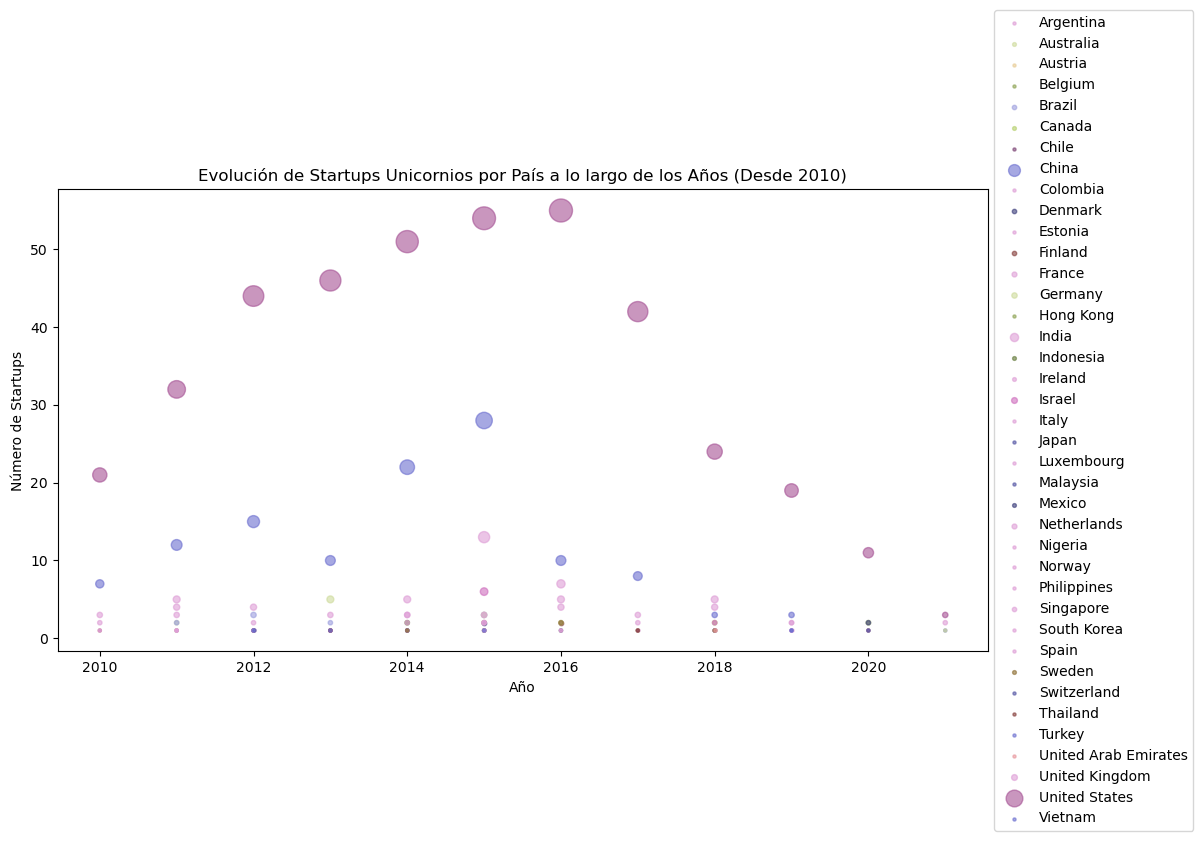

In [138]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtra unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2010]

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Agrupa los datos por país y año para el tamaño de las burbujas
bubble_data = startup_counts.groupby(['Country', 'Founded Year'])['Count'].sum().reset_index()

# Define una paleta de colores personalizada
colores = [plt.cm.tab20b(i) for i in range(len(bubble_data['Country'].unique()))]

# Crea un gráfico de burbujas
fig, ax = plt.subplots(figsize=(12, 6))

for i, (country, data) in enumerate(bubble_data.groupby('Country')):
    # Utiliza colores aleatorios de la paleta definida
    color = random.choice(colores)
    ax.scatter(data['Founded Year'], data['Count'], label=country, alpha=0.6, s=data['Count'] * 5, c=[color])

# Añade etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Número de Startups')
ax.set_title('Evolución de Startups Unicornios por País a lo largo de los Años (Desde 2010)')

# Muestra la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Muestra el gráfico
plt.show()

In [139]:
# Convierte la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtra unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2000]

# Crea un DataFrame con el recuento de unicornios por país
startup_counts = df_unicorns_recent.groupby(['Country']).size().reset_index(name='Count')

# Ordena el DataFrame por el número de startups de manera descendente
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Selecciona los 13 países con más startups
top_13_countries = startup_counts.head(13)

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Filtra las filas solo para los países que están en el top 13
startup_counts = startup_counts[startup_counts['Country'].isin(top_13_countries['Country'])]

# Crea un mapa de calor
fig = px.imshow(startup_counts.pivot_table(index='Country', columns='Founded Year', values='Count', fill_value=0),
                labels={'x': 'Año', 'y': 'País', 'color': 'Número de Startups'},
                title='Evolución de Startups Unicornios en los 13 Países Principales a lo largo de los Años (Desde 2010)')

# Muestra el mapa de calor
fig.show()

In [140]:
# Conviertimos la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtramos unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2000]

# Crea un DataFrame con el recuento de unicornios por país
startup_counts = df_unicorns_recent.groupby(['Country']).size().reset_index(name='Count')

# Ordena el DataFrame por el número de startups de manera descendente
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Selecciona los 13 países con más startups
top_13_countries = startup_counts.head(13)

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Filtra las filas solo para los países que están en el top 13
startup_counts = startup_counts[startup_counts['Country'].isin(top_13_countries['Country'])]

# Crea un scatter plot
fig = px.scatter(startup_counts, x='Founded Year', y='Country', size='Count',
                 labels={'Founded Year': 'Año', 'Country': 'País', 'Count': 'Número de Unicornios'},
                 title='Distribución de Startups Unicornios en los 13 Países Principales a lo largo de los Años (Desde 2010)')

fig.update_layout(title_text='Distribución de Startups Unicornios en los 13 Países Principales a lo largo de los Años (Desde 2010)', title_x=0.5)

# Muestra el scatter plot
fig.show()

In [141]:
# Conviertimos la columna "Founded Year" a valores numéricos
df_unicorns['Founded Year'] = pd.to_numeric(df_unicorns['Founded Year'], errors='coerce')

# Filtramos unicornios creados a partir de 2010
df_unicorns_recent = df_unicorns[df_unicorns['Founded Year'] >= 2000]

# Crea un DataFrame con el recuento de unicornios por país
startup_counts = df_unicorns_recent.groupby(['Country']).size().reset_index(name='Count')

# Ordena el DataFrame por el número de startups de manera descendente
startup_counts = startup_counts.sort_values(by='Count', ascending=False)

# Selecciona los 13 países con más startups
top_13_countries = startup_counts.head(13)

# Crea un DataFrame con el recuento de unicornios por país y año
startup_counts = df_unicorns_recent.groupby(['Country', 'Founded Year']).size().reset_index(name='Count')

# Filtra las filas solo para los países que están en el top 13
startup_counts = startup_counts[startup_counts['Country'].isin(top_13_countries['Country'])]

# Crea un scatter plot
fig = px.scatter(startup_counts, x='Founded Year', y='Country', size='Count',
                 labels={'Founded Year': 'Año', 'Country': 'País', 'Count': 'Número de Unicornios'},
                 title='Distribución de Startups Unicornios en los 13 Países Principales a lo largo de los Años (Desde 2010)',
                 color='Count')

fig.update_layout(title_text='Distribución de Startups Unicornios en los 13 Países Principales a lo largo de los Años (Desde 2010)', title_x=0.5)

# Muestra el scatter plot
fig.show()

In [69]:
import pandas as pd
import plotly.express as px

# Selecciona las columnas relevantes para el radar chart
df_radar = df_unicorns[['Company', 'Valuation ($B)', 'Total Raised', 'Investors Count', 'Deal Terms', 'Portfolio Exits']]

# Renombra las columnas para que tengan nombres más descriptivos
df_radar = df_radar.rename(columns={'Valuation ($B)': 'Valoración ($B)', 'Total Raised': 'Recaudación Total',
                                    'Investors Count': 'Número de Inversionistas', 'Deal Terms': 'Términos de Acuerdo',
                                    'Portfolio Exits': 'Salidas de Portafolio'})

# Configura las columnas numéricas para asegurarte de que se traten como números
df_radar['Valoración ($B)'] = df_radar['Valoración ($B)'].str.replace('$', '').astype(float)

# Función para convertir la columna 'Recaudación Total' en números
def convert_recaudacion(recaudacion):
    if isinstance(recaudacion, str):
        if 'B' in recaudacion:
            return float(recaudacion.replace('$', '').replace('B', '')) * 1000  # Convertir miles de millones a millones
        elif 'M' in recaudacion:
            return float(recaudacion.replace('$', '').replace('M', ''))
    return 0.0

df_radar['Recaudación Total'] = df_radar['Recaudación Total'].apply(convert_recaudacion)

# Filtra el DataFrame para incluir solo ByteDance, SpaceX y SHEIN
selected_companies = ['ByteDance', 'SpaceX', 'SHEIN']
df_selected = df_radar[df_radar['Company'].isin(selected_companies)]

# Crea un gráfico de radar con las empresas seleccionadas
fig = px.line_polar(df_selected, r=['Valoración ($B)', 'Recaudación Total', 'Número de Inversionistas', 'Términos de Acuerdo', 'Salidas de Portafolio'],
                    theta=['Valoración ($B)', 'Recaudación Total', 'Número de Inversionistas', 'Términos de Acuerdo', 'Salidas de Portafolio'],
                    line_close=True,
                    labels={'Valoración ($B)': 'Valoración ($B)', 'Recaudación Total': 'Recaudación Total',
                            'Número de Inversionistas': 'Número de Inversionistas', 'Términos de Acuerdo': 'Términos de Acuerdo',
                            'Salidas de Portafolio': 'Salidas de Portafolio'},
                    title='Radar Chart de ByteDance, SpaceX y SHEIN')

# Muestra el gráfico de radar
fig.show()


In [70]:
import pandas as pd
import plotly.express as px

# Selecciona las primeras 3 filas y las columnas relevantes
df_radar = df_unicorns.iloc[:3][['Company', 'Valuation ($B)', 'Total Raised', 'Deal Terms']]

# Renombra las columnas para que tengan nombres más descriptivos
df_radar = df_radar.rename(columns={'Valuation ($B)': 'Valoración ($B)', 'Total Raised': 'Recaudación Total', 'Deal Terms': 'Términos de Acuerdo'})

# Configura las columnas numéricas para asegurarte de que se traten como números
df_radar['Valoración ($B)'] = df_radar['Valoración ($B)'].str.replace('$', '').astype(float)

# Función para convertir la columna 'Recaudación Total' en números
def convert_recaudacion(recaudacion):
    if isinstance(recaudacion, str):
        if 'B' in recaudacion:
            return float(recaudacion.replace('$', '').replace('B', '')) * 1000  # Convertir miles de millones a millones
        elif 'M' in recaudacion:
            return float(recaudacion.replace('$', '').replace('M', ''))
    return 0.0

df_radar['Recaudación Total'] = df_radar['Recaudación Total'].apply(convert_recaudacion)

# Crea un gráfico de radar
fig = px.line_polar(df_radar, r=['Valoración ($B)', 'Recaudación Total', 'Términos de Acuerdo'],
                    theta=['Valoración ($B)', 'Recaudación Total', 'Términos de Acuerdo'],
                    line_close=True,
                    color=df_radar.index,  # Colorea las líneas por fila
                    labels={'Valoración ($B)': 'Valoración ($B)', 'Recaudación Total': 'Recaudación Total', 'Términos de Acuerdo': 'Términos de Acuerdo'},
                    title='Radar Chart de las 3 primeras filas de df_unicorns')

# Muestra el gráfico de radar
fig.show()


In [72]:
df_unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1221 non-null   object 
 1   Valuation ($B)    1226 non-null   object 
 2   Date Joined       1226 non-null   object 
 3   Country           1226 non-null   object 
 4   City              1226 non-null   object 
 5   Industry_x        1226 non-null   object 
 6   Industry_y        940 non-null    object 
 7   Select Investors  1224 non-null   object 
 8   Founded Year      908 non-null    float64
 9   Total Raised      918 non-null    object 
 10  Financial Stage   43 non-null     object 
 11  Investors Count   940 non-null    float64
 12  Deal Terms        914 non-null    float64
 13  Portfolio Exits   43 non-null     float64
dtypes: float64(4), object(10)
memory usage: 134.2+ KB


In [73]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [74]:
coordenadas = {
    'San Francisco, USA': (37.7749, -122.4194),
    'Beijing, China': (39.9042, 116.4074),
    'Shenzhen, China': (22.5431, 114.0579),
    'Londres, Reino Unido': (51.5074, -0.1278),
    'Surry Hills, Australia': (-33.885, 151.211),
    'Filadelfia, USA': (39.9526, -75.1652),
    'Múnich, Alemania': (48.1351, 11.5820),
    'Waltham, USA': (42.3765, -71.2356)
}

In [78]:
# Cremos la figura Scattergeo de Plotly
fig = go.Figure(go.Scattergeo())

# Coordinates
lat_beijing, lon_beijing = (39.9042, 116.4074)
lat_shenzhen, lon_shenzhen = (22.5431, 114.0579)
lat_london, lon_london = (51.5074, -0.1278)
lat_surry_hills, lon_surry_hills = (-33.885, 151.211)
lat_philadelphia, lon_philadelphia = (39.9526, -75.1652)
lat_munich, lon_munich = (48.1351, 11.5820)
lat_waltham, lon_waltham = (42.3765, -71.2356)
lat_san_francisco = 37.7749
lon_san_francisco = -122.4194

lon_bj = 39.9042
lon_bj 
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    # lon = [lon_sf],
    # lat = [lat_sf],
    lon = [
        lon_san_francisco,
        lon_beijing, 
        lon_shenzhen,
        lon_london,
        lon_surry_hills,
        lon_philadelphia,
        lon_munich,
        lon_waltham],
    lat = [
        lat_san_francisco,
        lat_beijing, 
        lat_shenzhen,
        lat_london,
        lat_surry_hills,
        lat_philadelphia,
        lat_munich,
        lat_waltham],
    mode = 'markers',
    marker = dict(
        size = 10,
        opacity = 0.8,
        color = 'red',  # Puedes personalizar el color del punto
    ),
    text = 'San Francisco'  # Puedes personalizar el texto que aparecerá al hacer clic en el punto
))

fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0, "t":0, "l":0, "b":0})
pyo.plot(fig, filename='mi_grafico.html')

fig.show()

In [80]:


fig = go.Figure(go.Scattergeo())

# Define las coordenadas de San Francisco
lat_sf = 37.7749
lon_sf = -122.4194

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    # lon = [lon_sf],
    # lat = [lat_sf],
    mode = 'markers',
    marker = dict(
        size = 10,
        opacity = 0.8,
        color = 'red',  # Puedes personalizar el color del punto
    ),
    text = 'San Francisco'  # Puedes personalizar el texto que aparecerá al hacer clic en el punto
))
# Diccionario de coordenadas
coordenadas = {
    'San Francisco, USA': (37.7749, -122.4194),
    'Beijing, China': (39.9042, 116.4074),
    'Shenzhen, China': (22.5431, 114.0579),
    'Londres, Reino Unido': (51.5074, -0.1278),
    'Surry Hills, Australia': (-33.885, 151.211),
    'Filadelfia, USA': (39.9526, -75.1652),
    'Múnich, Alemania': (48.1351, 11.5820),
    'Waltham, USA': (42.3765, -71.2356)
}

# Agregar puntos para cada ciudad
for ciudad, (latitud, longitud) in coordenadas.items():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',  # Especifica que estamos utilizando coordenadas latitud/longitud
        lon=[longitud],
        lat=[latitud],
        mode='markers',
        marker=dict(
            size=10,
            opacity=0.8,
            color='red',  # Puedes personalizar el color del punto
        ),
        text=ciudad  # Personaliza el texto que aparecerá al hacer clic en el punto
    ))

fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0, "t":0, "l":0, "b":0})
pyo.plot(fig, filename='mi_grafico.html')
fig.update_layout(
    height=600,  # Altura en píxeles
    width=800,   # Ancho en píxeles
)

fig.show()